<a href="https://colab.research.google.com/github/Khushibung05/feature_selection/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**variance treshold**

In [2]:
import pandas as pd
import numpy as np
data=pd.DataFrame({
    'age':[25,30,35,40,45],
    'salary':[5000,6000,7000,8000,9000],
    'country_code':[1,1,1,1,1]
})
data

,age,salary,country_code
0,25,5000,1
1,30,6000,1
2,35,7000,1
3,40,8000,1
4,45,9000,1


In [3]:
from sklearn.feature_selection import VarianceThreshold

selector=VarianceThreshold(threshold=0.1)#less features
selected_data=selector.fit_transform(data)

selected_features=data.columns[selector.get_support()]
print("Selected features:",selected_features)

Selected features: Index(['age', 'salary'], dtype='object')


**Scenario:** Hospital Disease Prediction System
You are building a machine learning model to predict whether a patient has a particular disease.
The dataset contains the following features:
Age
Blood Pressure
Cholesterol Level
Gender
Country Code
Hospital ID
Machine Version Used for Testing
After initial exploration, you notice:
Country Code is 100% “India” for all records
Machine Version is 99% “v2.1” and only 1% “v2.2”
Hospital ID is same for all patients
❓ Question:
Which feature selection technique would you apply first?
Which features would likely be removed?
Why is removing these features important before training?
What problem might occur if you keep them?


In [4]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Create a sample DataFrame based on the scenario
data_scenario = pd.DataFrame({
    'Age': [30, 45, 50, 35, 60],
    'Blood Pressure': [120, 130, 140, 125, 135],
    'Cholesterol Level': [200, 220, 210, 190, 230],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Country Code': ['India', 'India', 'India', 'India', 'India'],
    'Hospital ID': ['H1', 'H1', 'H1', 'H1', 'H1'],
    'Machine Version Used for Testing': ['v2.1', 'v2.1', 'v2.1', 'v2.1', 'v2.2'] # 4/5 v2.1, 1/5 v2.2 to simulate 99%/1%
})
display(data_scenario)

,Age,Blood Pressure,Cholesterol Level,Gender,Country Code,Hospital ID,Machine Version Used for Testing
0,30,120,200,Male,India,H1,v2.1
1,45,130,220,Female,India,H1,v2.1
2,50,140,210,Male,India,H1,v2.1
3,35,125,190,Female,India,H1,v2.1
4,60,135,230,Male,India,H1,v2.2


In [5]:
# For VarianceThreshold, all features must be numerical. We'll convert categorical features using one-hot encoding.
# However, for features like 'Country Code' and 'Hospital ID' which are constant, even after one-hot encoding, one category will be 1 for all rows, and others 0.
# Let's first demonstrate with the numerical features and then consider the categorical ones' implications.

# Calculate variance for numerical columns first to understand
print("Variance of numerical features:")
for col in ['Age', 'Blood Pressure', 'Cholesterol Level']:
    print(f"  {col}: {data_scenario[col].var()}")

# Note: VarianceThreshold works directly on numerical data. For categorical data, you often need to one-hot encode first.
# For 'Country Code' (all 'India'), 'Hospital ID' (all 'H1'), after one-hot encoding, 'Country Code_India' and 'Hospital ID_H1' would be a column of all 1s, hence 0 variance.
# For 'Machine Version Used for Testing', after one-hot encoding, 'Machine Version Used for Testing_v2.1' would be mostly 1s and 'Machine Version Used for Testing_v2.2' mostly 0s, resulting in low variance.

# Let's apply one-hot encoding to handle categorical variables for a full demonstration
data_encoded = pd.get_dummies(data_scenario, drop_first=False) # Keep all categories to show the constant columns
display(data_encoded)

print("\nVariance of all encoded features:")
print(data_encoded.var())

# Apply VarianceThreshold
# We'll set a threshold slightly above 0 to remove features with very low variance.
# For example, a threshold of 0.01 might remove 'Machine Version Used for Testing_v2.2' (or v2.1 depending on which one is dropped by drop_first)
# and definitely 'Country Code_India', 'Hospital ID_H1' as their variance is 0.
selector = VarianceThreshold(threshold=0.01)

# Fit and transform the data
selected_data_array = selector.fit_transform(data_encoded)

# Get the names of the selected features
selected_features = data_encoded.columns[selector.get_support()]

print(f"\nFeatures before selection: {list(data_encoded.columns)}")
print(f"Selected features after Variance Thresholding (threshold=0.01): {list(selected_features)}")

# Create a DataFrame with selected features for better readability
data_selected = data_encoded[selected_features]
display(data_selected)

Variance of numerical features:
  Age: 142.5
  Blood Pressure: 62.5
  Cholesterol Level: 250.0


,Age,Blood Pressure,Cholesterol Level,Gender_Female,Gender_Male,Country Code_India,Hospital ID_H1,Machine Version Used for Testing_v2.1,Machine Version Used for Testing_v2.2
0,30,120,200,False,True,True,True,True,False
1,45,130,220,True,False,True,True,True,False
2,50,140,210,False,True,True,True,True,False
3,35,125,190,True,False,True,True,True,False
4,60,135,230,False,True,True,True,False,True



Variance of all encoded features:
Age                                      142.5
Blood Pressure                            62.5
Cholesterol Level                        250.0
Gender_Female                              0.3
Gender_Male                                0.3
Country Code_India                         0.0
Hospital ID_H1                             0.0
Machine Version Used for Testing_v2.1      0.2
Machine Version Used for Testing_v2.2      0.2
dtype: float64

Features before selection: ['Age', 'Blood Pressure', 'Cholesterol Level', 'Gender_Female', 'Gender_Male', 'Country Code_India', 'Hospital ID_H1', 'Machine Version Used for Testing_v2.1', 'Machine Version Used for Testing_v2.2']
Selected features after Variance Thresholding (threshold=0.01): ['Age', 'Blood Pressure', 'Cholesterol Level', 'Gender_Female', 'Gender_Male', 'Machine Version Used for Testing_v2.1', 'Machine Version Used for Testing_v2.2']


,Age,Blood Pressure,Cholesterol Level,Gender_Female,Gender_Male,Machine Version Used for Testing_v2.1,Machine Version Used for Testing_v2.2
0,30,120,200,False,True,True,False
1,45,130,220,True,False,True,False
2,50,140,210,False,True,True,False
3,35,125,190,True,False,True,False
4,60,135,230,False,True,False,True


##**correlation coefficients**

In [6]:
import pandas as pd
import numpy as np
data=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000], # Added one more element to match other column lengths
    'titles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})
data

,size_sqft,titles_count,price
0,1000,100,200000
1,1500,150,300000
2,2000,200,400000
3,2500,250,500000
4,3000,300,600000


In [7]:
correlation_matrix=data.corr()
print(correlation_matrix)

              size_sqft  titles_count  price
size_sqft           1.0           1.0    1.0
titles_count        1.0           1.0    1.0
price               1.0           1.0    1.0


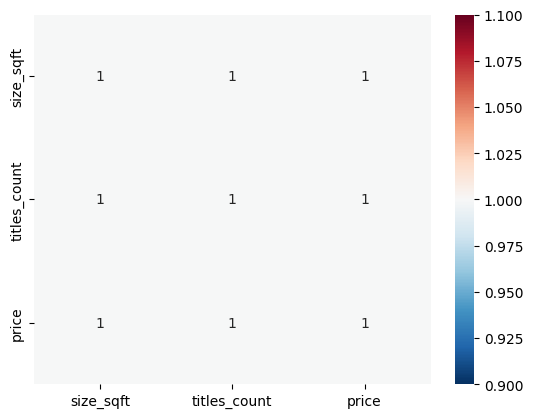

In [8]:
import matplotlib.pyplot  as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu_r')
plt.show()

In [9]:
#Removing highly correlated featuresn(>0.9)
upper=correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
)
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("Highly correlated features to drop:",to_drop)

Highly correlated features to drop: ['titles_count', 'price']


🏠 **Scenario:** Real Estate Price Prediction
You are developing a regression model to predict house prices.
Dataset contains:
House Size (sqft)
Number of Tiles
Total Construction Cost
Number of Bedrooms
Market Price
After calculating correlation matrix, you find:
House Size and Number of Tiles have 0.98 correlation
Construction Cost is highly correlated (0.95) with House Size
❓ Question:
Why is high correlation between features a problem?
Which feature(s) would you remove and why?
What issue can occur if highly correlated features are kept?
Which filter method is appropriate here?

,House Size (sqft),Number of Tiles,Total Construction Cost,Number of Bedrooms,Market Price
0,1000,105,180000,2,250000
1,1200,120,215000,3,300000
2,1500,155,270000,3,380000
3,1800,178,320000,4,450000
4,2000,195,360000,4,500000
5,2200,215,400000,5,560000
6,2500,248,450000,5,620000



Correlation Matrix:


,House Size (sqft),Number of Tiles,Total Construction Cost,Number of Bedrooms,Market Price
House Size (sqft),1.000000,0.998487,0.999738,0.964796,0.999382
Number of Tiles,0.998487,1.000000,0.998218,0.954390,0.997586
Total Construction Cost,0.999738,0.998218,1.000000,0.965251,0.999647
Number of Bedrooms,0.964796,0.954390,0.965251,1.000000,0.968306
Market Price,0.999382,0.997586,0.999647,0.968306,1.000000


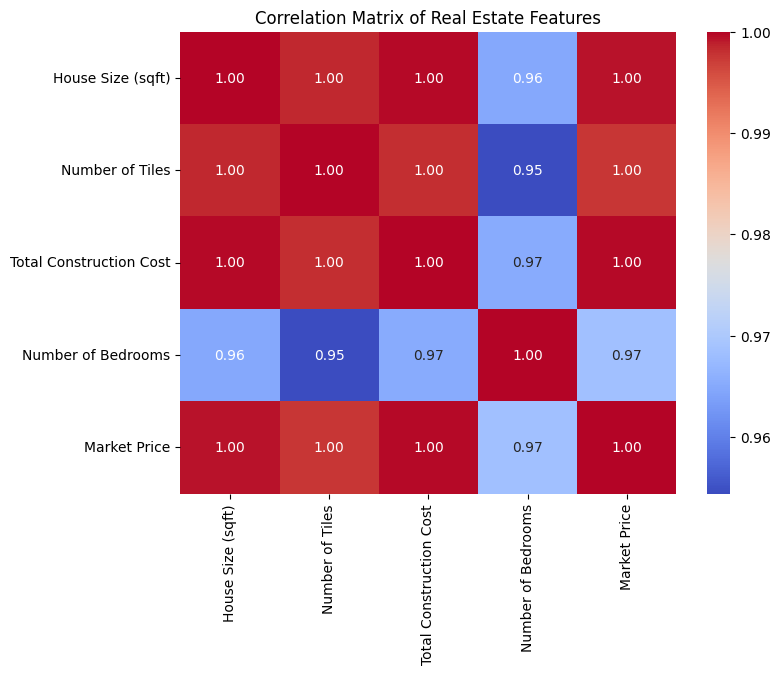

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a sample DataFrame based on the real estate scenario
data_real_estate = pd.DataFrame({
    'House Size (sqft)': [1000, 1200, 1500, 1800, 2000, 2200, 2500],
    'Number of Tiles': [105, 120, 155, 178, 195, 215, 248], # Highly correlated with House Size
    'Total Construction Cost': [180000, 215000, 270000, 320000, 360000, 400000, 450000], # Highly correlated with House Size
    'Number of Bedrooms': [2, 3, 3, 4, 4, 5, 5],
    'Market Price': [250000, 300000, 380000, 450000, 500000, 560000, 620000]
})
display(data_real_estate)

# Calculate the correlation matrix
correlation_matrix_real_estate = data_real_estate.corr()
print("\nCorrelation Matrix:")
display(correlation_matrix_real_estate)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_real_estate, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Real Estate Features')
plt.show()

In [11]:
# Identify highly correlated features to drop using a list comprehension
# We'll consider features highly correlated if their absolute correlation with another feature is > 0.9

upper_tri = correlation_matrix_real_estate.where(np.triu(np.ones(correlation_matrix_real_estate.shape), k=1).astype(bool))

to_drop_high_corr = [
    column for column in upper_tri.columns
    if any(abs(upper_tri[column]) > 0.9) and column != 'Market Price'
]

print(f"Features to consider removing due to high correlation: {to_drop_high_corr}")

# Based on the scenario and typical importance:
# 'Number of Tiles' is highly correlated with 'House Size (sqft)'. Keep 'House Size (sqft)'.
# 'Total Construction Cost' is highly correlated with 'House Size (sqft)'. Keep 'House Size (sqft)'.

# Manually define features to drop based on the scenario and calculated correlations:
features_to_remove = []
# If 'Number of Tiles' is highly correlated with 'House Size (sqft)', drop 'Number of Tiles'.
if 'Number of Tiles' in data_real_estate.columns and abs(correlation_matrix_real_estate.loc['House Size (sqft)', 'Number of Tiles']) > 0.9:
    features_to_remove.append('Number of Tiles')

# If 'Total Construction Cost' in data_real_estate.columns and abs(correlation_matrix_real_estate.loc['House Size (sqft)', 'Total Construction Cost']) > 0.9:
if 'Total Construction Cost' in data_real_estate.columns and abs(correlation_matrix_real_estate.loc['House Size (sqft)', 'Total Construction Cost']) > 0.9:
    features_to_remove.append('Total Construction Cost')

print(f"\nFeatures to consider removing due to high correlation (based on scenario): {features_to_remove}")

# Create a new DataFrame with the selected features
data_filtered = data_real_estate.drop(columns=features_to_remove)

print("\nDataFrame after removing highly correlated features:")
display(data_filtered)

Features to consider removing due to high correlation: ['Number of Tiles', 'Total Construction Cost', 'Number of Bedrooms']

Features to consider removing due to high correlation (based on scenario): ['Number of Tiles', 'Total Construction Cost']

DataFrame after removing highly correlated features:


,House Size (sqft),Number of Bedrooms,Market Price
0,1000,2,250000
1,1200,3,300000
2,1500,3,380000
3,1800,4,450000
4,2000,4,500000
5,2200,5,560000
6,2500,5,620000


##**chi-square test**
categorical data

In [12]:
import pandas as pd

x=pd.DataFrame({
    'gender':[0,1,0,1,1],
    'married':[1,1,0,0,1],
    'income':[20000,40000,50000,30000,60000]
})
y=[0,1,1,0,1]
x

,gender,married,income
0,0,1,20000
1,1,1,40000
2,0,0,50000
3,1,0,30000
4,1,1,60000


In [13]:
# chi-square requires non-negative values
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

selector=SelectKBest(score_func=chi2,k=2)
x_new=selector.fit_transform(x_scaled,y)

selected_features=x.columns[selector.get_support()]

print("selected Features:",selected_features)

selected Features: Index(['married', 'income'], dtype='object')


**Scenario:** Loan Approval Classification
You are building a classification model to predict whether a loan will be approved.
Dataset features:
Gender (Male/Female)
Marital Status (Yes/No)
Education Level (Graduate/Non-Graduate)
Applicant Income
Property Area (Urban/Rural)
Favorite Color
Loan Status (Approved/Rejected)
You want to identify which categorical features significantly influence loan approval.
❓ Question:
Which filter method is most appropriate here?
Which type of features can be tested using this method?
If “Favorite Color” has a very low chi-square score, what does it indicate?
Why is chi-square suitable only for classification problems?

                    Gender  Marital_Status  Education  Applicant_Income  \
Gender            1.000000        1.000000  -1.000000          0.796003   
Marital_Status    1.000000        1.000000  -1.000000          0.796003   
Education        -1.000000       -1.000000   1.000000         -0.796003   
Applicant_Income  0.796003        0.796003  -0.796003          1.000000   
Property_Area     1.000000        1.000000  -1.000000          0.796003   
Favorite_Color    0.912871        0.912871  -0.912871          0.934262   
Loan_Status      -1.000000       -1.000000   1.000000         -0.796003   

                  Property_Area  Favorite_Color  Loan_Status  
Gender                 1.000000        0.912871    -1.000000  
Marital_Status         1.000000        0.912871    -1.000000  
Education             -1.000000       -0.912871     1.000000  
Applicant_Income       0.796003        0.934262    -0.796003  
Property_Area          1.000000        0.912871    -1.000000  
Favorite_Color       

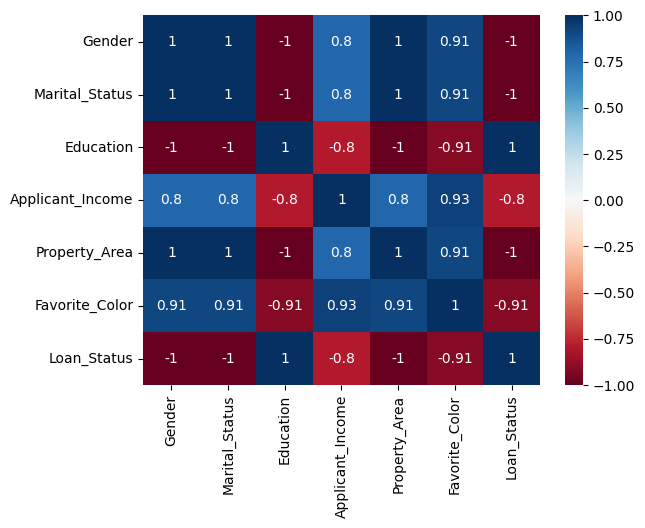

Highly correlated features to drop: ['Marital_Status', 'Property_Area', 'Favorite_Color', 'Loan_Status']

Dataset after removing correlated features:
   Gender  Education  Applicant_Income
0       1          0              5000
1       0          1              3000
2       1          0              4000
3       1          0              6000
4       0          1              3500

Selected features: Index(['Marital_Status', 'Education', 'Property_Area'], dtype='object')


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- DATASET ----------------
data = pd.DataFrame({
    "Gender": ["Male","Female","Male","Male","Female"],
    "Marital_Status": ["Yes","No","Yes","Yes","No"],
    "Education": ["Graduate","Non-Graduate","Graduate","Graduate","Non-Graduate"],
    "Applicant_Income": [5000,3000,4000,6000,3500],
    "Property_Area": ["Urban","Rural","Urban","Urban","Rural"],
    "Favorite_Color": ["Red","Blue","Green","Red","Blue"],
    "Loan_Status": ["Approved","Rejected","Approved","Approved","Rejected"]
})

# ---------------- ENCODE CATEGORICAL ----------------
from sklearn.preprocessing import LabelEncoder

df = data.copy()
for col in df.columns:
    if df[col].dtype == "object":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# ---------------- SPLIT X and y ----------------
X = df.drop("Loan_Status", axis=1)
y = df["Loan_Status"]

# ---------------- CORRELATION (sir code style) ----------------
correlation_matrix = df.corr()
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='RdBu')
plt.show()

upper = correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)

to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:", to_drop)

data_filtered = df.drop(columns=to_drop)
print("\nDataset after removing correlated features:")
print(data_filtered.head())

# ---------------- CHI-SQUARE FEATURE SELECTION ----------------
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

selector = SelectKBest(score_func=chi2, k=3)   # select top 3 features
X_new = selector.fit_transform(X_scaled, y)

selected_features = X.columns[selector.get_support()]
print("\nSelected features:", selected_features)

###**wrapper methods**

In [15]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

data=load_breast_cancer()
x=pd.DataFrame(data.data,columns=data.feature_names)
y=data.target
print(x.head())
print(x.shape)

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector#forward or backward

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Increased max_iter to allow the model to converge
model=LogisticRegression(max_iter=1000)

In [17]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

In [18]:
from sklearn.feature_selection import SequentialFeatureSelector # Added import

#forward selection
sfs=SequentialFeatureSelector(model,n_features_to_select=5,direction='forward')
sfs.fit(x_train_scaled,y_train) # Use scaled data
selected_features=x_train.columns[sfs.get_support()]
print("Selected Features (Forward Selection):",selected_features)

Selected Features (Forward Selection): Index(['mean radius', 'worst radius', 'worst texture', 'worst smoothness',
       'worst concavity'],
      dtype='object')


In [19]:
from sklearn.feature_selection import SequentialFeatureSelector # Added import

#backward selection
sfs=SequentialFeatureSelector(model,n_features_to_select=5,direction='backward')
sfs.fit(x_train_scaled,y_train) # Use scaled data
selected_features=x_train.columns[sfs.get_support()]
print("Selected Features (Backward Selection):",selected_features)

Selected Features (Backward Selection): Index(['worst texture', 'worst area', 'worst smoothness', 'worst concavity',
       'worst fractal dimension'],
      dtype='object')


In [21]:
##recursive forwar elimination(rfe)
from sklearn.feature_selection import RFE
model=LogisticRegression(max_iter=1000)
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(x_train_scaled,y_train)
selected_features=x_train.columns[rfe.support_]
print("Selected Features (RFE):",selected_features)

Selected Features (RFE): Index(['mean concave points', 'worst radius', 'worst texture',
       'worst perimeter', 'worst concave points'],
      dtype='object')
